<a href="https://colab.research.google.com/github/simsekergun/ENEE691/blob/main/week13/LSTM_Example3layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Google Stock Price Prediction using LSTM

#### Steps to build stock prediction model

- Data Preprocessing
- Building the LSTM
- Making the prediction and visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/simsekergun/DATA601/main/Datasets/GOOGL.csv', date_parser = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [ ]:
data_training = data[data['Date']<'2021-02-01'].copy()
data_test = data[data['Date']>='2021-02-01'].copy()

In [ ]:
data_training2 = data_training.drop(['Date', 'Adj Close'], axis = 1)
data_test2 = data_test.drop(['Date', 'Adj Close'], axis = 1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(data_training2)
data_training_scaled = scaler.transform(data_training2)
data_testing_scaled = scaler.transform(data_test2)

In [ ]:
data_training_scaled[0:10]

array([[2.17596486e-04, 6.17257754e-04, 0.00000000e+00, 8.88990008e-05,
        5.41019639e-01],
       [4.88923448e-04, 1.95287901e-03, 1.24074278e-03, 2.23594726e-03,
        2.73839600e-01],
       [3.10546909e-03, 3.12354133e-03, 3.57738089e-03, 2.52958281e-03,
        2.17792771e-01],
       [3.23710111e-03, 2.62334917e-03, 2.07974687e-03, 1.30924198e-03,
        1.80958981e-01],
       [1.55004735e-03, 1.66553329e-03, 2.16446704e-03, 1.61365479e-03,
        1.06787555e-01],
       [1.54736096e-03, 1.65223085e-03, 2.37763284e-03, 2.12819143e-03,
        8.11562953e-02],
       [2.39357423e-03, 1.83049064e-03, 2.65912463e-03, 1.65406235e-03,
        7.03451321e-02],
       [1.63601182e-03, 9.97723725e-04, 1.65341255e-03, 5.38783438e-04,
        5.79196322e-02],
       [8.35467710e-04, 5.24136972e-04, 1.69440509e-03, 6.35764166e-04,
        5.45050633e-02],
       [9.42923295e-04, 3.27253565e-04, 1.01391026e-03, 6.46543570e-05,
        1.06171180e-01]])

In [ ]:
X_train = []
y_train = []

In [ ]:
# We will have an RNN with 60 timesteps, i.e. look 60 previous timesteps
for i in range(60, data_training_scaled.shape[0]):
    X_train.append(data_training_scaled[i-60:i])
    #y_train.append(data_training_scaled[i,0])    # many to one
    y_train.append(data_training_scaled[i])      # many to many

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((4081, 60, 5), (4081, 5))

In [ ]:
# prepare the test data
X_test = []
y_test = []
for i in range(60, data_testing_scaled.shape[0]):
    X_test.append(data_testing_scaled[i-60:i])
    # y_test.append(data_testing_scaled[i, 0])  # many to one
    y_test.append(data_testing_scaled[i])   # many to many
X_test, y_test = np.array(X_test), np.array(y_test)    
X_test.shape, y_test.shape

((230, 60, 5), (230, 5))

### Building LSTM 

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'tanh', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, activation = 'tanh'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 5))

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_1 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               72400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 5)                 5

In [ ]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
history = regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
128/128 [==============================] - 14s 12ms/step - loss: 0.0065
Epoch 2/10
128/128 [==============================] - 1s 11ms/step - loss: 0.0025
Epoch 3/10
128/128 [==============================] - 1s 11ms/step - loss: 0.0021
Epoch 4/10
128/128 [==============================] - 1s 11ms/step - loss: 0.0018
Epoch 5/10
128/128 [==============================] - 2s 15ms/step - loss: 0.0017
Epoch 6/10
128/128 [==============================] - 2s 13ms/step - loss: 0.0015
Epoch 7/10
128/128 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 8/10
128/128 [==============================] - 1s 11ms/step - loss: 0.0013
Epoch 9/10
128/128 [==============================] - 1s 11ms/step - loss: 0.0013
Epoch 10/10
128/128 [==============================] - 1s 11ms/step - loss: 0.0013


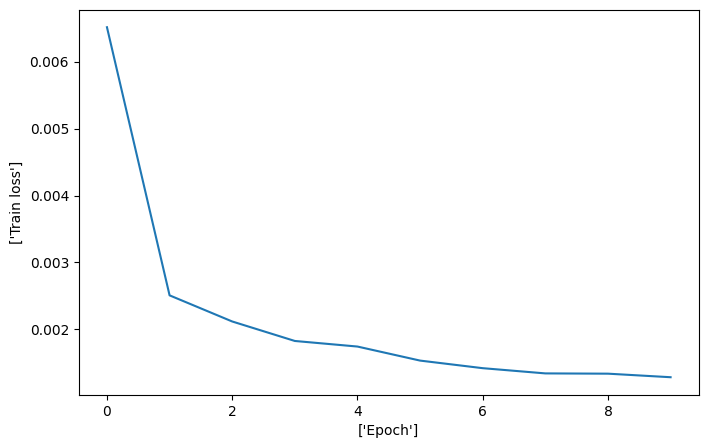

In [ ]:
# Plotting the loss function from model's history
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.ylabel(['Train loss'])
plt.xlabel(['Epoch'])
plt.show()

### Prepare test dataset 

In [ ]:
y_pred = regressor.predict(X_test)

8/8 [==============================] - 1s 5ms/step


In [ ]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [ ]:
y_test.shape

(230, 5)

### Visualization 

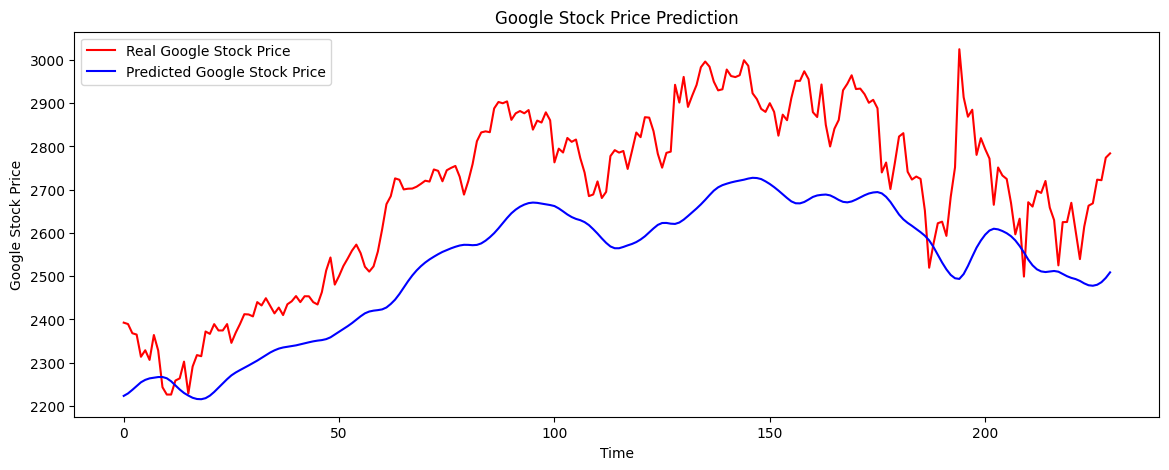

In [ ]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test[:,0], color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred[:,0], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction with LSTM (3 layers)')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()